# Are You a Tolkien Baby?

The Social Security Administration makes all its data on baby names available to the public, which as you can imagine leads to some fun analyses. I decided to look at the influence Tolkien, in particular the *Lord of the Rings* novels, has had on baby names over the decades since the books were published.

## The Data

You can download the entire data set from [here](https://www.ssa.gov/oact/babynames/limits.html). It goes back as far as 1880. I was only concerned with 1954 to 2015 because '54 was the year the first two books were published and '15 is the latest year available. 

The Social Security Administration notes: 

> To safeguard privacy, we restrict our list of names to those with at least 5 occurrences

So I'm not getting *every* person out there named after a Tolkien character, but it's good enough for a blog post.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
years = range(1954,2016)

In [3]:
pieces = []

In [4]:
columns =['name','sex','births']

After downloading and extracting the data into a folder, I ran a `for` loop over each year to pull all relevant data into one place.

In [5]:
for year in years:
    path = 'data/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [6]:
names = pd.concat(pieces, ignore_index=True)

Next, I compiled a list of all the main characters from the novels.

In [7]:
character_names = np.array(["Aragorn","Arwen","Bilbo","Boromir","Denethor","Elrond","Eomer","Eowyn","Faramir","Frodo","Galadriel","Gandalf","Gimli","Gollum","Haldir","Isildur","Legolas","Meriadoc","Peregrin","Samwise","Saruman","Theoden"])

In [8]:
print(character_names)

['Aragorn' 'Arwen' 'Bilbo' 'Boromir' 'Denethor' 'Elrond' 'Eomer' 'Eowyn'
 'Faramir' 'Frodo' 'Galadriel' 'Gandalf' 'Gimli' 'Gollum' 'Haldir'
 'Isildur' 'Legolas' 'Meriadoc' 'Peregrin' 'Samwise' 'Saruman' 'Theoden']


I then used that list to subset the dataframe with all names.

In [9]:
names_df = names[names['name'].isin(character_names)]

Then using the `pandas` `pivot_table` function, I looked at all births with names from a Tolkien character by year.

In [10]:
names_pivot = pd.pivot_table(names_df,index=['year'],aggfunc=sum)

## One Ring to Name Them All

Looking at the first five observations, it appears that the first year in which 5 or more births were recorded with names from the list was 1968.

In [11]:
print(names_pivot.head())

      births
year        
1968       5
1969      10
1970      30
1971      23
1972      22


The first figure below shows all births with character names from the list, from 1968 to 2015. It appears that there was a slight uptick in the 70s, which increased toward the end of the decade presumably because of the 1978 animated film by Ralph Bakshi. Then the number of births skyrockets after the release of Peter Jackson's first film in 2001, *The Fellowship of the Ring*.

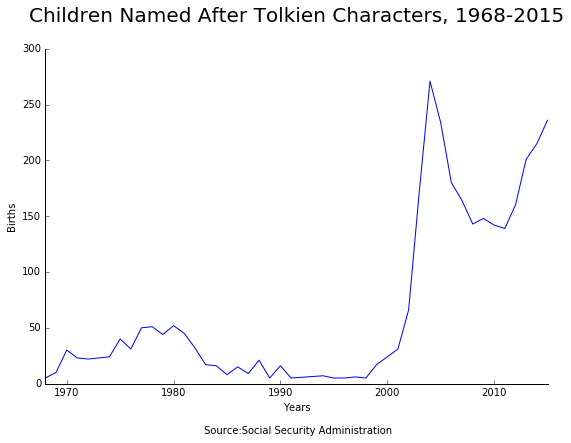

In [12]:
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(names_pivot)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlim(1968,2015)
plt.title("Children Named After Tolkien Characters, 1968-2015\n", fontsize=20)
plt.xlabel("Years\n\n Source:Social Security Administration")
plt.ylabel("Births")

Next, I broke the births down by gender.

In [13]:
boys = names_df[names_df['sex']=="M"]

In [14]:
girls = names_df[names_df['sex']=="F"]

As you can see from the figure below, the trend is mostly girls. Considering the names for men in the *Lord of the Rings* novels, I can see why a name like Arwen is more popular than Gandalf. (**Full disclosure**: A former colleague of mine is named Arwen and I actually think it's a cool name. Sadly I don't know any Gandalfs).

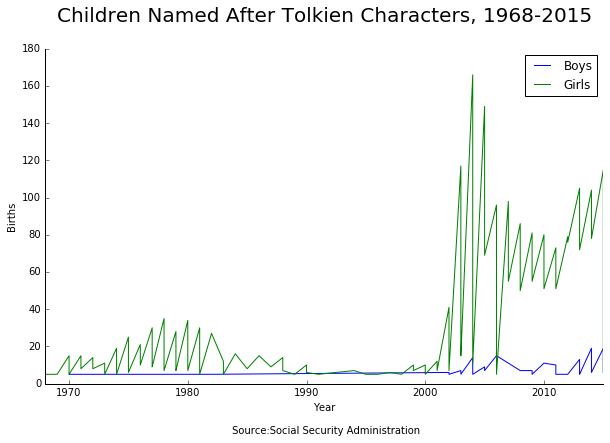

In [15]:
fig,ax = plt.subplots(figsize=(10,6)) 
ax.plot(boys['year'],boys['births'],label="Boys")
ax.plot(girls['year'],girls['births'],label="Girls")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlim(1968,2015)
plt.xlabel("Year\n\n Source:Social Security Administration")
plt.ylabel("Births")
plt.title("Children Named After Tolkien Characters, 1968-2015\n", fontsize=20)
ax.legend()

So which names are the most popular by gender?

In [16]:
boys_names = boys.pivot_table(boys, index=['name'],aggfunc=np.sum)

In [17]:
boys_names = boys_names.drop('year',1)
boys_names.sort_values(['births'],ascending=False)

,births
name,
Theoden,130
Samwise,49
Aragorn,43
Peregrin,29
Legolas,13
Gandalf,5


For boys, Theoden leads the very small pack, followed by Samwise, Aragorn and Peregrin. It looks like Legolas and Gandalf are the least-popular names. If you know a Gandalf, congratulations, that's pretty rare! Based on the most-recent monthly population estimates for the United States by the U.S. Census Bureau, Population Division, there were 312,418,820 people living in the U.S as of July 2015.<sup>[1]</sup> That means 0.00000160041% of the population is named Gandalf!

Samwise a tough name. Even if you knew someone named Samwise, he'd probably go by Sam. On the flipside, if someone is named Sam, it's difficult to tell (short of interviewing the parents) whether the name was inspired by Samwise or not.

The figure below shows the number of children named "Sam" since the books were published starting in 1954.

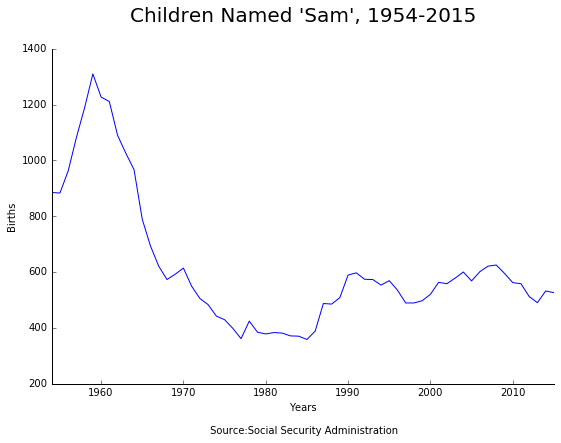

In [18]:
sams = names[names['name']=="Sam"]
sams_pivot = pd.pivot_table(sams,index=['year'],aggfunc=sum)
fig,ax = plt.subplots(figsize=(9,6))
ax.plot(sams_pivot)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlim(1954,2015)
plt.title("Children Named 'Sam', 1954-2015\n", fontsize=20)
plt.xlabel("Years\n\n Source:Social Security Administration")
plt.ylabel("Births")

There's a peak in 1960, but who knows if the books were responsible for that.

Next, I looked at the girls names.

In [19]:
girls_names = girls.pivot_table(girls, index=['name'],aggfunc=np.sum)

In [20]:
girls_names = girls_names.drop('year',1)
girls_names.sort_values(['births'],ascending=False)

,births
name,
Arwen,1843
Eowyn,879
Galadriel,174


Arwen leads the pack for girls. In fact, considering the totals for each name, it's more likely you know a girl or woman named after a *LotR* character than a boy or man.  

<hr/>

[1] The monthly estimates beginning with August 1, 2015 are short-term projections.